In [ ]:
# 🌲 EcoType: Forest Cover Type – Exploratory Data Analysis (EDA)

## Objective
To explore, understand, and analyze the Forest Cover Type dataset in order to:
- Understand feature distributions
- Detect skewness and outliers
- Analyze class imbalance
- Identify important relationships between features and target

This analysis supports feature engineering and model selection decisions.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


In [3]:
df = pd.read_csv("D:\Guvi\Eco_Type_Forest_Prediction\data\cover_type.csv")
df.head()


<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\siddharth\AppData\Local\Temp\ipykernel_9660\2325096536.py:1: SyntaxWarning: invalid escape sequence '\G'
  df = pd.read_csv("D:\Guvi\Eco_Type_Forest_Prediction\data\cover_type.csv")


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,Aspen,1,29
1,2590,56,2,212,-6,390,220,235,151,6225,Aspen,1,29
2,2804,139,9,268,65,3180,234,238,135,6121,Lodgepole Pine,1,12
3,2785,155,18,242,118,3090,238,238,122,6211,Lodgepole Pine,1,30
4,2595,45,2,153,-1,391,220,234,150,6172,Aspen,1,29


In [4]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145890 entries, 0 to 145889
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           145890 non-null  int64 
 1   Aspect                              145890 non-null  int64 
 2   Slope                               145890 non-null  int64 
 3   Horizontal_Distance_To_Hydrology    145890 non-null  int64 
 4   Vertical_Distance_To_Hydrology      145890 non-null  int64 
 5   Horizontal_Distance_To_Roadways     145890 non-null  int64 
 6   Hillshade_9am                       145890 non-null  int64 
 7   Hillshade_Noon                      145890 non-null  int64 
 8   Hillshade_3pm                       145890 non-null  int64 
 9   Horizontal_Distance_To_Fire_Points  145890 non-null  int64 
 10  Cover_Type                          145890 non-null  object
 11  Wilderness_Area                     145

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type
count,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000
mean,2874.458949,141.127418,11.925574,251.824738,34.554322,3313.827541,217.368106,224.874748,139.788203,3044.958105,1.186593,23.364905
std,210.801279,107.719296,6.319326,192.473899,41.215776,1687.779953,21.590298,16.084851,31.311690,1761.882341,0.656571,8.215184
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,1.000000,1.000000
25%,2747.000000,54.000000,7.000000,95.000000,7.000000,1848.000000,207.000000,216.000000,121.000000,1608.000000,1.000000,12.000000
50%,2909.000000,108.000000,11.000000,212.000000,23.000000,3420.000000,222.000000,226.000000,140.000000,2713.000000,1.000000,29.000000
75%,3004.000000,217.000000,15.000000,362.000000,51.000000,4673.000000,232.000000,236.000000,159.000000,4478.000000,1.000000,29.000000
max,3849.000000,360.000000,61.000000,1343.000000,554.000000,7117.000000,254.000000,254.000000,248.000000,7173.000000,4.000000,40.000000


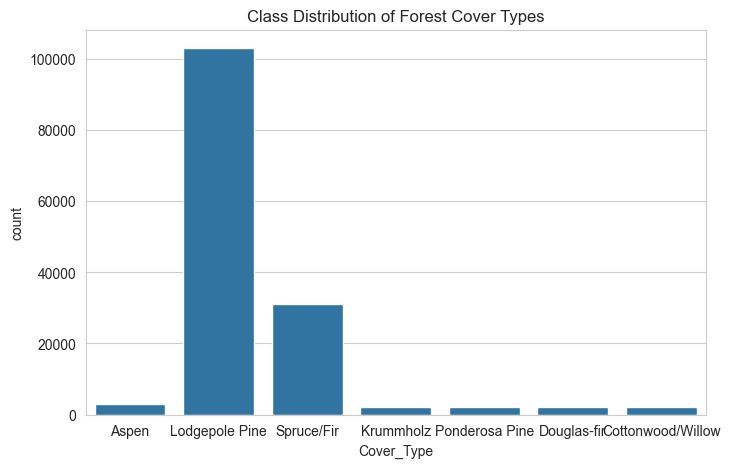

In [5]:
df["Cover_Type"].value_counts()
plt.figure(figsize=(8,5))
sns.countplot(x="Cover_Type", data=df)
plt.title("Class Distribution of Forest Cover Types")
plt.show()

In [7]:
df.isnull().sum()


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Cover_Type                            0
Wilderness_Area                       0
Soil_Type                             0
dtype: int64

In [8]:
df.duplicated().sum()


np.int64(0)

In [9]:
numeric_cols = df.columns.drop("Cover_Type")


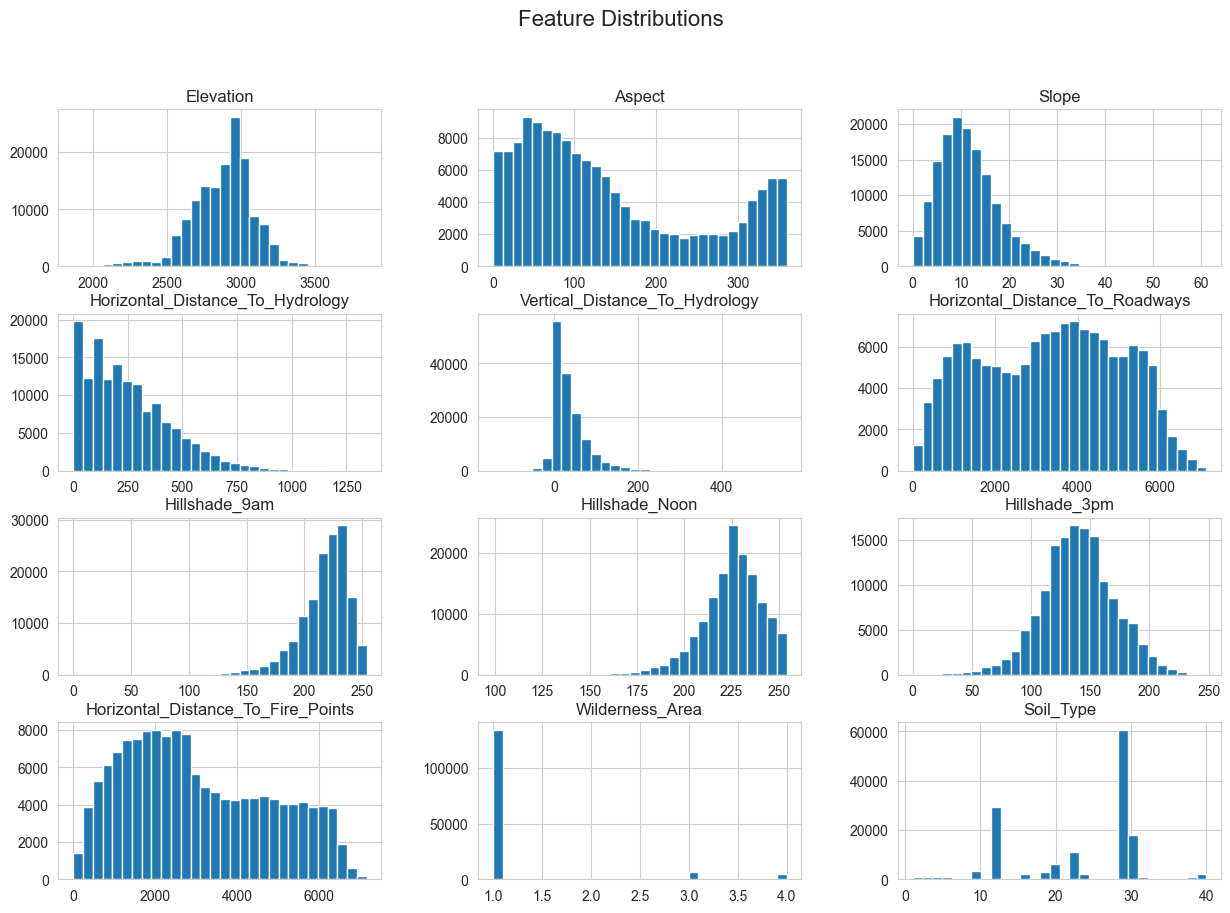

In [10]:
df[numeric_cols].hist(figsize=(15,10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


In [11]:
skewness = df[numeric_cols].skew().sort_values(ascending=False)
skewness


Wilderness_Area                       3.423545
Vertical_Distance_To_Hydrology        1.792939
Horizontal_Distance_To_Hydrology      0.984953
Slope                                 0.943937
Aspect                                0.689432
Horizontal_Distance_To_Fire_Points    0.365249
Horizontal_Distance_To_Roadways      -0.058240
Hillshade_3pm                        -0.165213
Elevation                            -0.664497
Soil_Type                            -0.692105
Hillshade_Noon                       -0.945446
Hillshade_9am                        -1.286839
dtype: float64

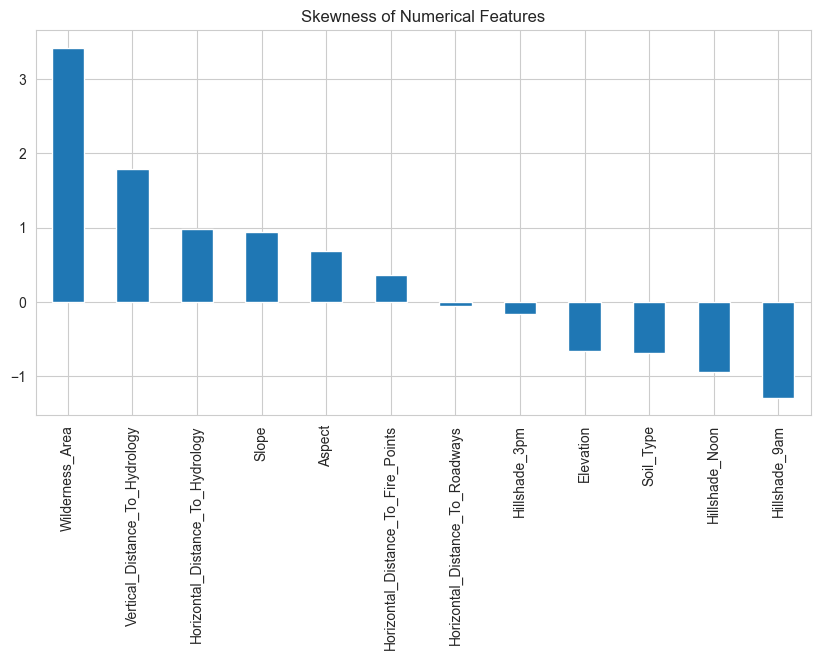

In [12]:
plt.figure(figsize=(10,5))
skewness.plot(kind="bar")
plt.title("Skewness of Numerical Features")
plt.show()


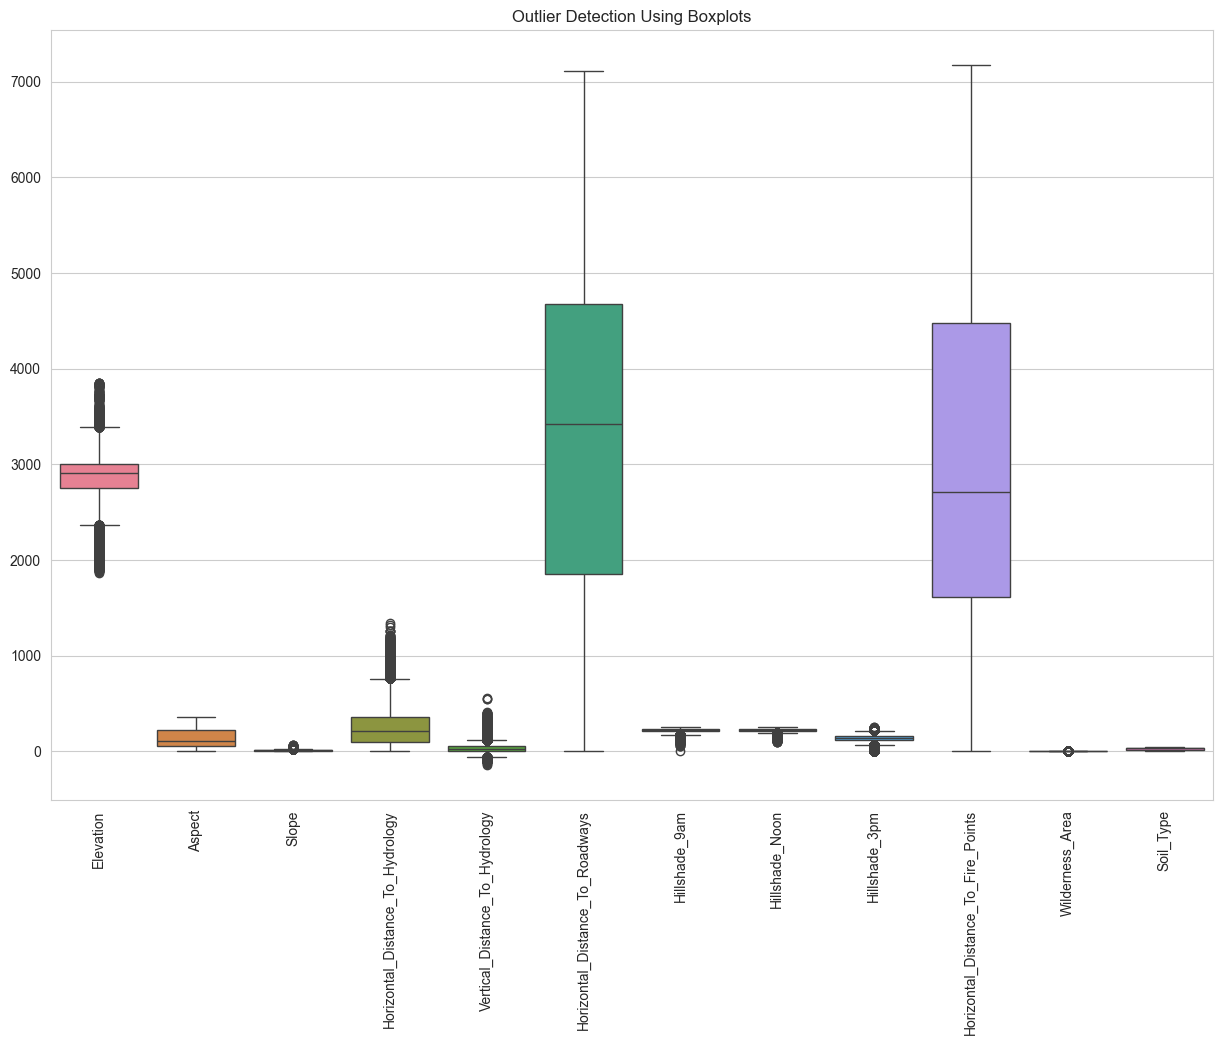

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Outlier Detection Using Boxplots")
plt.show()


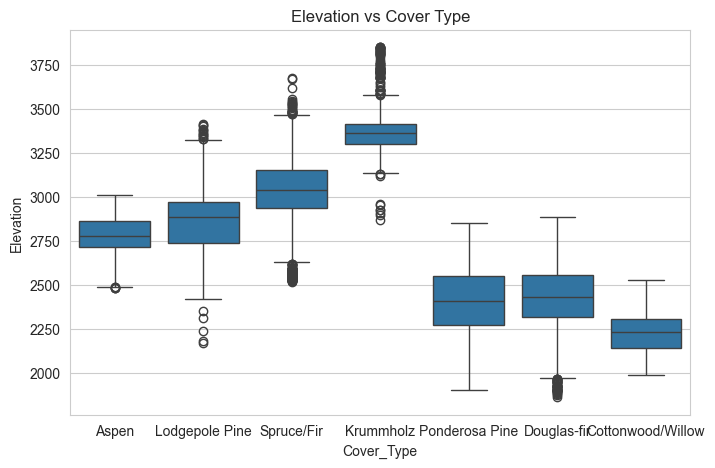

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Cover_Type", y="Elevation", data=df)
plt.title("Elevation vs Cover Type")
plt.show()


In [15]:
corr = df[numeric_cols].corr()


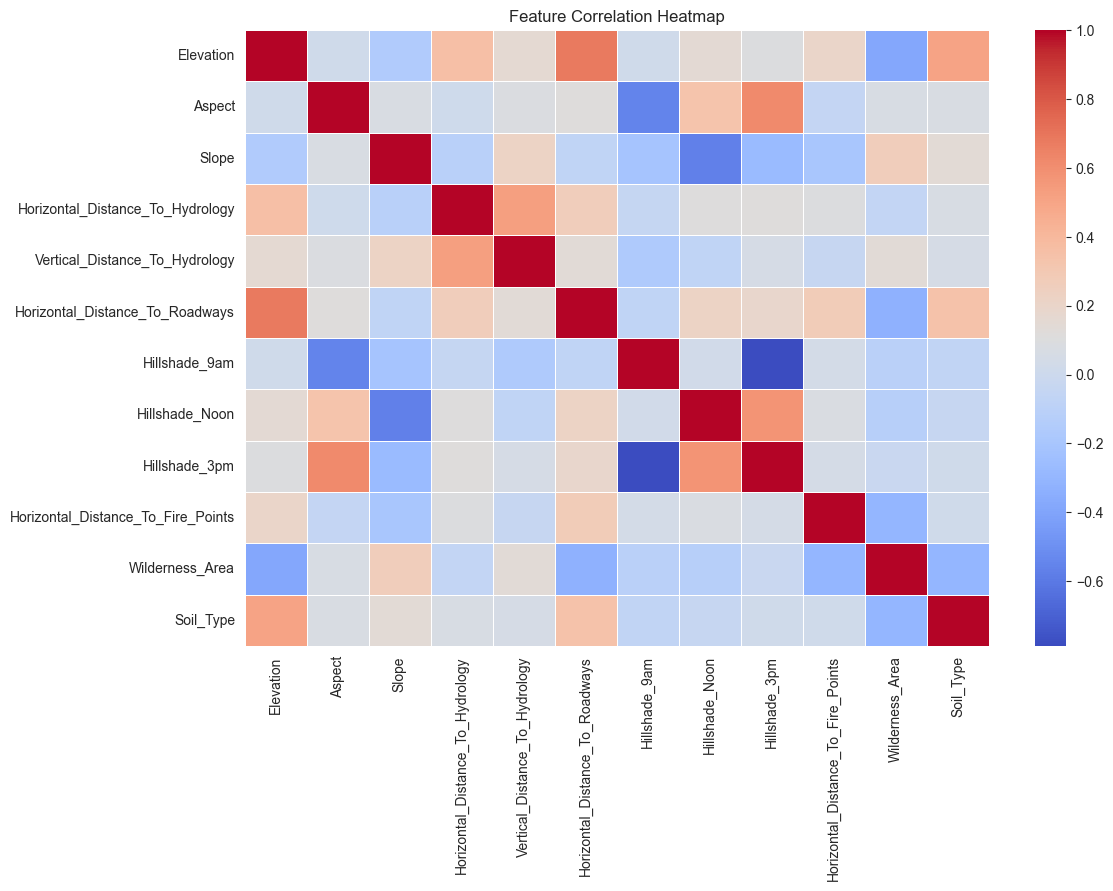

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [17]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_df.head(10)


,Feature,Importance
0,Elevation,0.268172
5,Horizontal_Distance_To_Roadways,0.148341
9,Horizontal_Distance_To_Fire_Points,0.136685
11,Soil_Type,0.085045
10,Wilderness_Area,0.070513
3,Horizontal_Distance_To_Hydrology,0.062932
4,Vertical_Distance_To_Hydrology,0.055896
1,Aspect,0.040641
6,Hillshade_9am,0.035301
7,Hillshade_Noon,0.035197


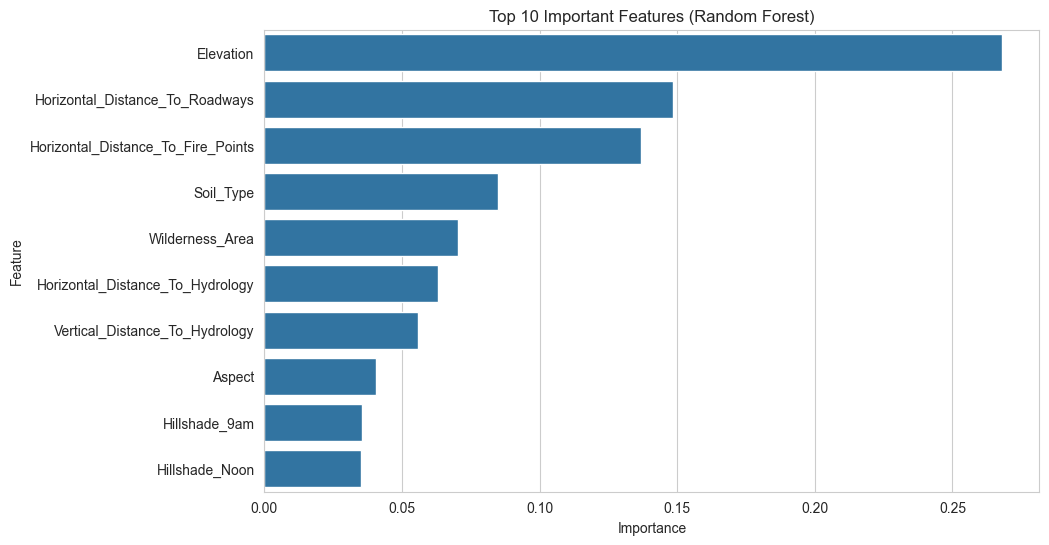

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=importance_df.head(10)
)
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


## 📌 EDA Summary & Key Insights

- Dataset is clean with no missing values
- Target variable is imbalanced → SMOTE required
- Several features exhibit high skewness → log transformation applied
- Elevation and distance-based features are most influential
- Correlation exists among hillshade features → feature selection beneficial

EDA findings guided preprocessing, feature engineering, and model selection.
